In [43]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('multiple_linear_regression_dataset.csv')
column_names = data.columns.tolist()

# Print column names
print(column_names)



['age', 'experience', 'income']


In [41]:
# Preprocess data
X = data.drop('income', axis=1)  # Independent variables
y = data['income']  # Dependent variable


In [42]:
# Define preprocessing steps for different types of columns
numeric_cols = ['age', 'experience']  # Columns with numeric values
categorical_cols = []  # Columns with categorical values (none in this case)

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Apply standardization to numeric columns
])

categorical_transformer = Pipeline(steps=[
    ('label_encoder', LabelEncoder()),  # Convert categorical values to numerical labels
    ('one_hot_encoder', OneHotEncoder())  # Perform one-hot encoding on categorical columns
])

preprocessor = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, numeric_cols),
    ('categorical', categorical_transformer, categorical_cols)
])

# Fit the preprocessor on X
X_preprocessed = preprocessor.fit_transform(X)

# Create the regression model
model = LinearRegression()

# Fit the model on preprocessed data
model.fit(X_preprocessed, y)

# Make predictions
y_pred = model.predict(X_preprocessed)

# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 1533633.9787141816
R-squared (R2): 0.9773361310180797


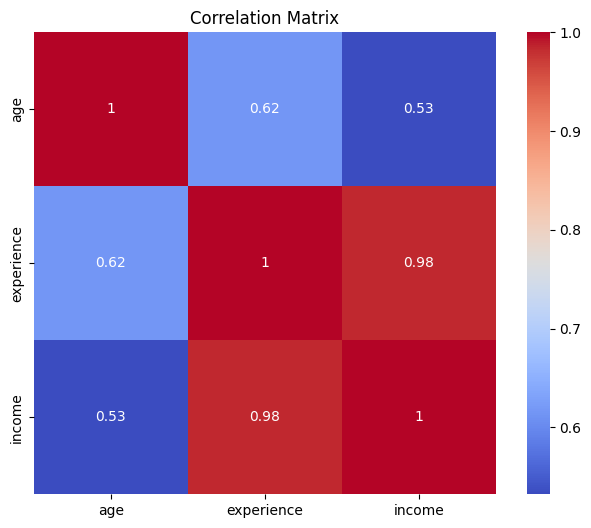

In [44]:
correlation_matrix = data.corr()

# Create a heatmap plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()